<a href="https://colab.research.google.com/github/MACHNACH/Scan-Sleuth--unveiling-brain-tumors-using-CNN-/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import drive
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Flatten,MaxPooling2D,Conv2D, BatchNormalization,Dropout,Input
from keras.models import Sequential
from keras.preprocessing import image_dataset_from_directory
#from keras.preprocessing.image import ImageDataGenerator # ImageDataGenerator is not in keras.preprocessing.image
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import ImageDataGenerator from tensorflow.keras.preprocessing.image
from PIL import Image
from sklearn.utils.class_weight import compute_class_weight
from keras.optimizers import Adam

In [ ]:
# Create a dictionary to map class labels to numeric values
classes = {
    'no_tumor': 0,
    'glioma_tumor': 1,
    'meningioma_tumor': 2,
    'pituitary_tumor': 3
}

In [ ]:
X = []  # List to store images
Y = []  # List to store corresponding labels

# Iterate through each class in the 'classes' dictionary
for cls in classes:
    # Construct the path to the directory for the current class in the training set
    train_path = os.path.join('/content/drive/MyDrive/major/BrainTumor/Training', cls) # Use os.path.join to create correct path

    # Iterate through each file in the training directory
    for j in os.listdir(train_path): # Iterate over files in the class directory
        # Read the image in grayscale
        img = cv2.imread(os.path.join(train_path, j), 0)

        # Check if the image was loaded successfully
        if img is not None:
            # Resize the image to (224, 224)
            img = cv2.resize(img, (224, 224))

            # Append the processed image to the 'X' list
            X.append(img)

            # Append the label corresponding to the current class to the 'Y' list
            Y.append(classes[cls])
        else:
            print(f"Failed to load image: {os.path.join(train_path, j)}")

    # Construct the path to the directory for the current class in the testing set
    test_path = os.path.join('/content/drive/MyDrive/major/BrainTumor/Testing', cls) # Use os.path.join to create correct path

    # Iterate through each file in the testing directory
    for j in os.listdir(test_path): # Iterate over files in the class directory
        # Read the image in grayscale
        img = cv2.imread(os.path.join(test_path, j), 0)

        # Check if the image was loaded successfully
        if img is not None:
            # Resize the image to (224, 224)
            img = cv2.resize(img, (224, 224))

            # Append the processed image to the 'X' list
            X.append(img)

            # Append the label corresponding to the current class to the 'Y' list
            Y.append(classes[cls])
        else:
            print(f"Failed to load image: {os.path.join(test_path, j)}")

In [ ]:
# Convert lists to NumPy arrays
X = np.array(X)
Y = np.array(Y)

In [ ]:
print(X.shape)

(3147, 224, 224)


In [ ]:
print(Y.shape)

(3147,)


In [ ]:
# Convert the NumPy array to a Pandas Series and then use value_counts
value_counts_result = pd.Series(Y).value_counts()
print(value_counts_result)

1    900
2    900
3    874
0    473
Name: count, dtype: int64


In [ ]:
# Upsample the data using RandomOverSampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X, Y = ros.fit_resample(X.reshape(len(X), -1), Y)

# Reshape the features back to images
X = X.reshape(-1, 224, 224)

In [ ]:
# Convert the NumPy array to a Pandas Series and then use value_counts
value_counts_result = pd.Series(Y).value_counts()
print(value_counts_result)

0    900
1    900
2    900
3    900
Name: count, dtype: int64


In [ ]:
# Now, X and Y are NumPy arrays and can be used in NumPy operations
print(X.shape)   # Shape of the array (number of images, height, width) for example
print(Y.shape)

(3600, 224, 224)
(3600,)


In [ ]:
# Y is a NumPy array containing labels
unique_labels = np.unique(Y)
print(unique_labels)

[0 1 2 3]


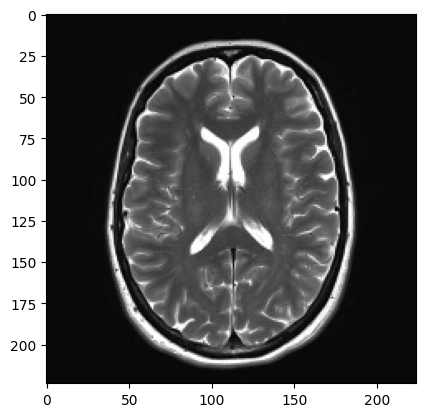

In [ ]:
# Visualize the first image
plt.imshow(X[0], cmap='gray')

In [ ]:
# Flatten the images
X_flat = X.reshape(len(X), -1)

In [ ]:
print("Original Image:")
print(X[0])
print("\nFlattened Image:")
print(X_flat[0])

Original Image:
[[10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]
 ...
 [10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]]

Flattened Image:
[10 10 10 ... 10 10 10]


In [ ]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X_flat, Y, test_size=0.2, random_state=42)


In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2880, 50176)
(2880,)
(720, 50176)
(720,)


In [ ]:
# Check the maximum and minimum values of the original data
print(X_train.max(), X_train.min())
print(X_test.max(), X_test.min())

255 0
255 0


In [ ]:
# Create a StandardScaler and fit-transform the training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Apply the same scaler to the testing data
X_test = scaler.transform(X_test)

In [ ]:
# Check the maximum and minimum values after Data Normalization
print(X_train.max(), X_train.min())
print(X_test.max(), X_test.min())

32.693000577588805 -2.6550351860464314
42.29689218127388 -2.6550351860464314


In [ ]:
# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
# Add channel dimension for grayscale images
x_train = np.expand_dims(x_train, axis=-1)
x_val = np.expand_dims(x_val, axis=-1)

# Create ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Create data generators
train_data_generator = datagen.flow(x_train, y_train, batch_size=32)
val_data_generator = datagen.flow(x_val, y_val, batch_size=32)

In [ ]:
# Get the number of augmented images in the training set
num_train_images = len(train_data_generator)

# Get the number of augmented images in the validation set
num_val_images = len(val_data_generator)

print(f"Number of augmented images in the training set: {num_train_images}")
print(f"Number of augmented images in the validation set: {num_val_images}")

Number of augmented images in the training set: 90
Number of augmented images in the validation set: 23


In [ ]:
# Feature extraction and CNN model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,907,332 (91.20 MB)

 Trainable params: 23,907,332 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_data_generator, epochs=50, validation_data=val_data_generator)



Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


90/90 ━━━━━━━━━━━━━━━━━━━━ 264s 3s/step - accuracy: 0.3587 - loss: 1.6680 - val_accuracy: 0.5208 - val_loss: 1.0880
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 323s 3s/step - accuracy: 0.6152 - loss: 0.9674 - val_accuracy: 0.6250 - val_loss: 0.8565
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 264s 3s/step - accuracy: 0.6624 - loss: 0.8395 - val_accuracy: 0.7389 - val_loss: 0.6627
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 261s 3s/step - accuracy: 0.7350 - loss: 0.6952 - val_accuracy: 0.7431 - val_loss: 0.6088
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 264s 3s/step - accuracy: 0.7435 - loss: 0.6584 - val_accuracy: 0.6778 - val_loss: 0.8372
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 321s 3s/step - accuracy: 0.7374 - loss: 0.6325 - val_accuracy: 0.8111 - val_loss: 0.5146
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 324s 3s/step - accuracy: 0.7979 - loss: 0.5284 - val_accuracy: 0.7028 - val_loss: 0.7180
Epoch 8/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 265s 3s/step - accuracy: 0.7773 - loss: 0.5664 - val_accuracy: 0.8264 - val_loss: 0.

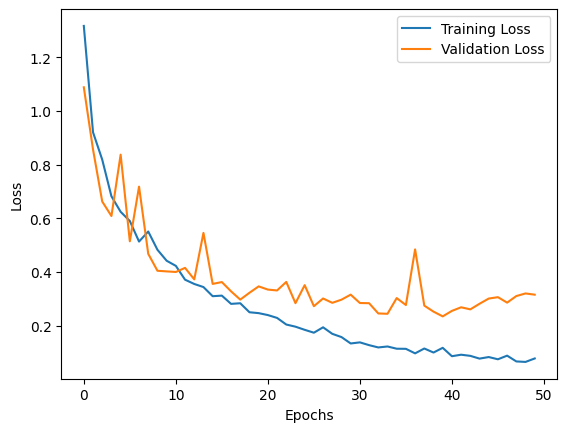

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

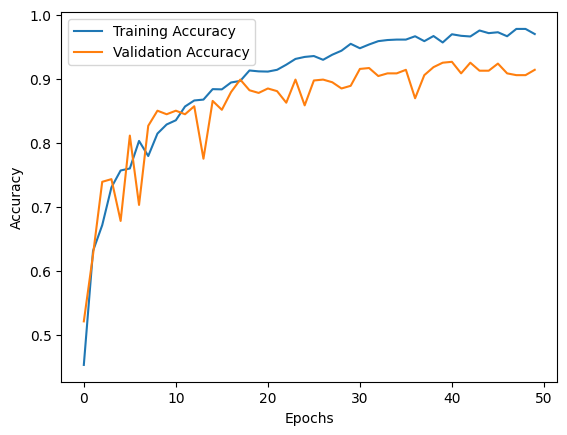

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
loss,acc = model.evaluate(train_data_generator)
print("Accuracy on Train Data:",acc)

loss,acc = model.evaluate(val_data_generator)
print("Accuracy on Test Data:",acc)

90/90 ━━━━━━━━━━━━━━━━━━━━ 75s 821ms/step - accuracy: 0.9810 - loss: 0.0569
Accuracy on Train Data: 0.9770833253860474
23/23 ━━━━━━━━━━━━━━━━━━━━ 18s 759ms/step - accuracy: 0.9227 - loss: 0.2485
Accuracy on Test Data: 0.9222221970558167


In [ ]:
from tensorflow.keras.models import save_model

# Save the entire model to a file in the TensorFlow SavedModel format
# Added the .keras extension to the filename
save_model(model, "my_cnn_model.keras")

In [ ]:
# Create a dictionary for mapping numeric class labels to human-readable string labels
class_label_mapping = {
    0: 'no_tumor',            # Numeric label 0 corresponds to 'no_tumor'
    1: 'glioma_tumor',        # Numeric label 1 corresponds to 'glioma_tumor'
    2: 'meningioma_tumor',    # Numeric label 2 corresponds to 'meningioma_tumor'
    3: 'pituitary_tumor'      # Numeric label 3 corresponds to 'pituitary_tumor'
}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


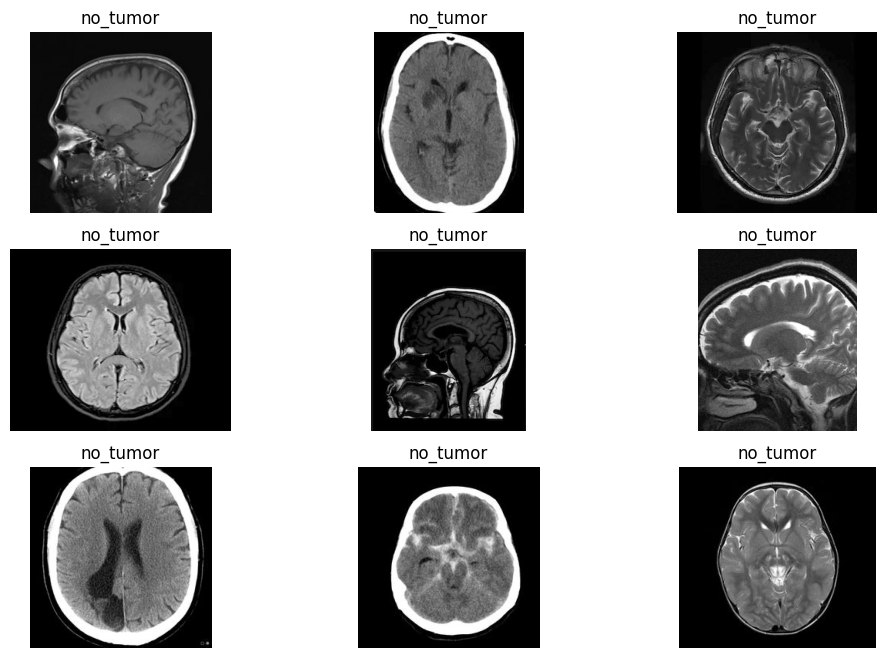

In [ ]:
# Set up the figure with a 3x3 grid of subplots
plt.figure(figsize=(12, 8))

# List all files in the 'no_tumor' testing directory
files_no_tumor = os.listdir('/content/drive/MyDrive/major/BrainTumor/Testing/no_tumor')[:9]

# Initialize subplot counter
c = 1

# Loop through the first 9 images in the 'no_tumor' testing directory
for i in files_no_tumor:
    # Create a subplot
    plt.subplot(3, 3, c)

    # Read and resize the image
    # Fix: Use os.path.join to correctly construct the image path
    img_path = os.path.join('/content/drive/MyDrive/major/BrainTumor/Testing/no_tumor', i)
    img = cv2.imread(img_path, 0)
    img1 = cv2.resize(img, (224, 224))  # Resize images to match the model's input shape

    # Flatten and normalize the image
    img1 = img1.reshape(1, 224, 224, 1) / 255

    # Make a prediction using the model
    prediction = model.predict(img1)

    # Get the predicted class label
    predicted_class = np.argmax(prediction)

    # Display the image with the predicted class label as the title
    plt.title(class_label_mapping[predicted_class])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Increment the subplot counter
    c += 1

# Show the subplots
plt.show()

In [ ]:
# Loop through the first 9 images in the 'glioma_tumor' testing directory
for i in files_glioma_tumor:
    # Create a subplot
    plt.subplot(3, 3, c)

    # Read and resize the image
    # Fix: Use os.path.join to correctly construct the image path
    img_path = os.path.join('/content/drive/MyDrive/major/BrainTumor/Testing/glioma_tumor', i)
    img = cv2.imread(img_path, 0)
    img1 = cv2.resize(img, (224, 224))  # Resize images to match the model's input shape

    # Flatten and normalize the image
    img1 = img1.reshape(1, 224, 224, 1) / 255

    # Make a prediction using the model
    prediction = model.predict(img1)

    # Get the predicted class label
    predicted_class = np.argmax(prediction)

    # Display the image with the predicted class label as the title
    plt.title(class_label_mapping[predicted_class])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Increment the subplot counter
    c += 1

NameError: name 'files_glioma_tumor' is not defined

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


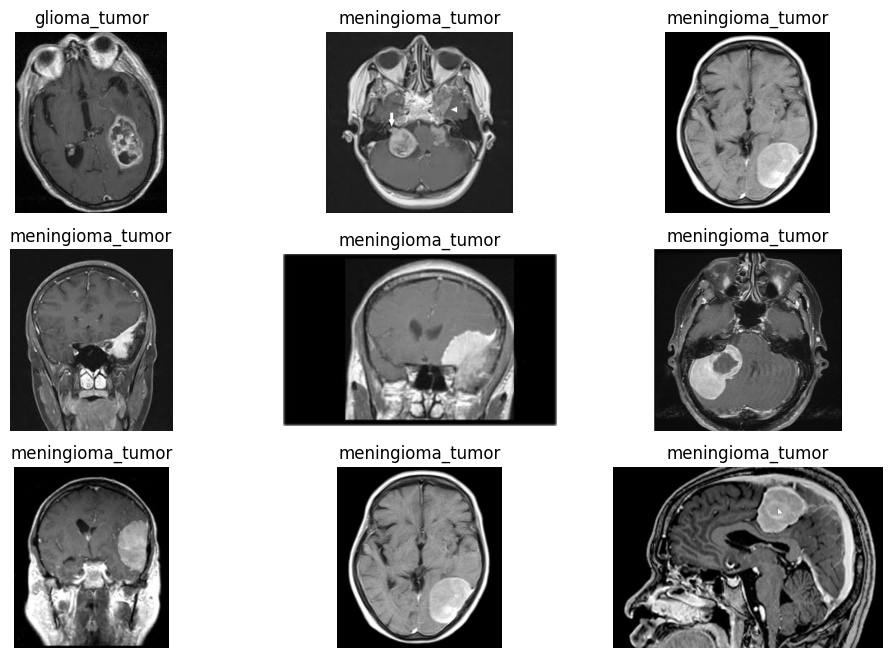

In [ ]:
# Set up the figure with a 3x3 grid of subplots
plt.figure(figsize=(12, 8))

# List all files in the 'meningioma_tumor' testing directory
files_meningioma_tumor = os.listdir('/content/drive/MyDrive/major/BrainTumor/Testing/meningioma_tumor')[:9]

# Initialize subplot counter
c = 1

# Loop through the first 9 images in the 'meningioma_tumor' testing directory
for i in files_meningioma_tumor:
    # Create a subplot
    plt.subplot(3, 3, c)

    # Read and resize the image
    # Fix: Use os.path.join to correctly construct the image path
    img_path = os.path.join('/content/drive/MyDrive/major/BrainTumor/Testing/meningioma_tumor', i)
    img = cv2.imread(img_path, 0)
    img1 = cv2.resize(img, (224, 224))  # Resize images to match the model's input shape

    # Flatten and normalize the image
    img1 = img1.reshape(1, 224, 224, 1) / 255

    # Make a prediction using the model
    prediction = model.predict(img1)

    # Get the predicted class label
    predicted_class = np.argmax(prediction)

    # Display the image with the predicted class label as the title
    plt.title(class_label_mapping[predicted_class])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Increment the subplot counter
    c += 1

# Show the subplots
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


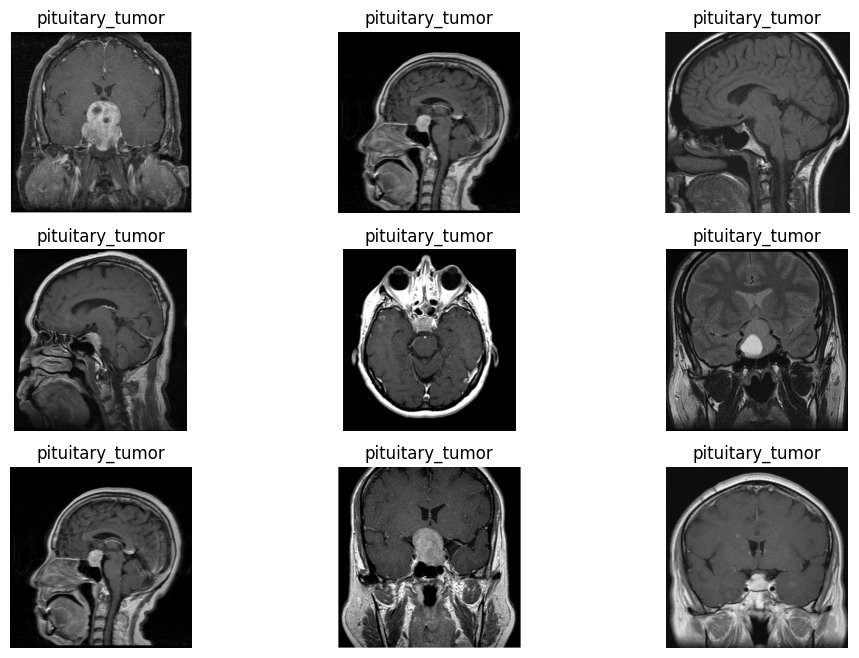

In [ ]:
# Set up the figure with a 3x3 grid of subplots
plt.figure(figsize=(12, 8))

# List all files in the 'pituitary_tumor' testing directory
files_pituitary_tumor = os.listdir('/content/drive/MyDrive/major/BrainTumor/Testing/pituitary_tumor')[:9]

# Initialize subplot counter
c = 1

# Loop through the first 9 images in the 'pituitary_tumor' testing directory
for i in files_pituitary_tumor:
    # Create a subplot
    plt.subplot(3, 3, c)

    # Read and resize the image
    # Fix: Use os.path.join to correctly construct the image path
    img_path = os.path.join('/content/drive/MyDrive/major/BrainTumor/Testing/pituitary_tumor', i)
    img = cv2.imread(img_path, 0)
    img1 = cv2.resize(img, (224, 224))  # Resize images to match the model's input shape

    # Flatten and normalize the image
    img1 = img1.reshape(1, 224, 224, 1) / 255

    # Make a prediction using the model
    prediction = model.predict(img1)

    # Get the predicted class label
    predicted_class = np.argmax(prediction)

    # Display the image with the predicted class label as the title
    plt.title(class_label_mapping[predicted_class])
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    # Increment the subplot counter
    c += 1

# Show the subplots
plt.show()

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.models import load_model  # Assuming you're using Keras

# Load your trained model (replace with your model file path)
model = load_model('my_cnn_model.keras')

# Define your class labels (replace with your own labels)
class_label_mapping = {
    0: 'Glioma Tumor',
    1: 'Meningioma Tumor',
    2: 'Pituitary Tumor',
    3: 'No Tumor'
}

# Function to preprocess the input image
def preprocess_image(image_path, target_size=(224, 224)):
    # Read the image
    img = cv2.imread(image_path, 0)  # Read image in grayscale

    # Check if the image was loaded successfully
    if img is None:
        print(f"Error: Could not load image from path: {image_path}")
        return None  # Or raise an exception

    # Resize the image to the input shape expected by the model
    img_resized = cv2.resize(img, target_size)
    # Normalize and reshape the image
    img_normalized = img_resized.reshape(1, target_size[0], target_size[1], 1) / 255.0
    return img_normalized

# Example of predicting a single image
# Fix: Add the correct image file extension (e.g., .jpg, .png)
image_path = '/content/drive/MyDrive/major/BrainTumor/Testing/Meningioma_tumor/image(1).jpg'  # Replace with your input image path with extension

# Preprocess the input image
input_image = preprocess_image(image_path)

# Check if preprocessing was successful
if input_image is not None:
    # Make the prediction
    prediction = model.predict(input_image)

    # Get the predicted class label
    predicted_class = np.argmax(prediction)

    # Display the image and prediction
    img_display = cv2.imread(image_path, 0)  # Read the image in grayscale for display
    plt.imshow(img_display, cmap='gray')
    plt.title(f"Predicted: {class_label_mapping[predicted_class]}")
    plt.axis('off')
    plt.show()

    # Print the predicted class
    print(f"Predicted Tumor Type: {class_label_mapping[predicted_class]}")
else:
    print("Image preprocessing failed. Skipping prediction.")

Error: Could not load image from path: /content/drive/MyDrive/major/BrainTumor/Testing/Meningioma_tumor/image(1).jpg
Image preprocessing failed. Skipping prediction.
